In [14]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

**Import** **library**

In [15]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [16]:
IMAGE_SIZE = [299, 299]
train_path = 'drive/MyDrive/project/data/train'
valid_path = 'drive/MyDrive/project/data/val'


Load a dataset from the google drive.In data set there are three floder one is train set and another is test set.In all three floder there four sub floder is there. 1.diseased cotton leaf 2.diseased cotton plant 3.fresh cotton leaf 4.fresh cotton plant

In [17]:

xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [18]:
for layer in xception.layers:
    layer.trainable = False
folders = glob('drive/MyDrive/project/data/train/*')
print("length of train floder is:",len(folders))
x = Flatten()(xception.output)
prediction = Dense(len(folders), activation='softmax')(x)
xception_model = Model(inputs=xception.input, outputs=prediction)

length of train floder is: 4


In [19]:

xception_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('drive/MyDrive/project/data/train',
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
val_set = test_datagen.flow_from_directory('drive/MyDrive/project/data/val',
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


In [21]:
xception_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

r = xception_model.fit_generator(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
  )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 958s 16s/step - loss: 3.2560 - accuracy: 0.6928 - val_loss: 0.8182 - val_accuracy: 0.8981
Epoch 2/20
61/61 [==============================] - 50s 811ms/step - loss: 1.1296 - accuracy: 0.8952 - val_loss: 0.9710 - val_accuracy: 0.8858
Epoch 3/20
61/61 [==============================] - 49s 809ms/step - loss: 0.6678 - accuracy: 0.9223 - val_loss: 1.6875 - val_accuracy: 0.8889
Epoch 4/20
61/61 [==============================] - 49s 809ms/step - loss: 0.8853 - accuracy: 0.9187 - val_loss: 1.1493 - val_accuracy: 0.9074
Epoch 5/20
61/61 [==============================] - 49s 810ms/step - loss: 0.9990 - accuracy: 0.9221 - val_loss: 0.5814 - val_accuracy: 0.9537
Epoch 6/20
61/61 [==============================] - 49s 807ms/step - loss: 0.4541 - accuracy: 0.9609 - val_loss: 0.5459 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 49s 806ms/step - loss: 0.4719 - accuracy: 0.9525 - val_loss: 0.5492 - val_accuracy: 0.9537


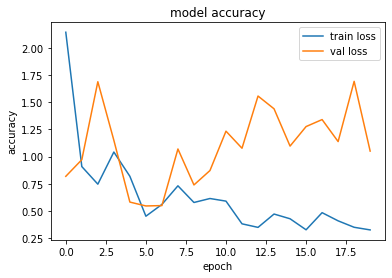

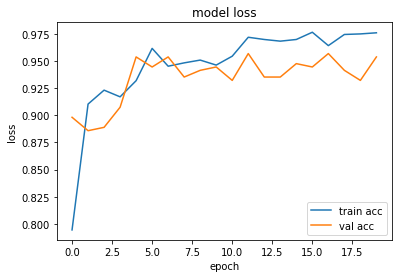

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
from tensorflow.keras.models import load_model
xception_model.save('/content/drive/MyDrive/project/Xception.h5')

In [24]:
import numpy as np
from tensorflow.keras.preprocessing import image
predictions = ["diseased cotton leaf","diseased cotton plant","fresh cotton leaf","fresh cotton plant"]
test_image = image.load_img('/content/drive/MyDrive/project/data/test/diseased cotton leaf/dis_leaf (124).jpg', target_size = (299,299))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = xception_model.predict(test_image)
predictions[result.argmax()]

'diseased cotton leaf'

In [27]:
import numpy as np
from tensorflow.keras.preprocessing import image
predictions = ["diseased cotton leaf","diseased cotton plant","fresh cotton leaf","fresh cotton plant"]
test_image = image.load_img('/content/drive/MyDrive/project/data/test/diseased cotton plant/dd (367).jpg', target_size = (299,299))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = xception_model.predict(test_image)
predictions[result.argmax()]

'diseased cotton plant'

In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
predictions = ["diseased cotton leaf","diseased cotton plant","fresh cotton leaf","fresh cotton plant"]
test_image = image.load_img('/content/drive/MyDrive/project/data/test/fresh cotton leaf/d (341).jpg', target_size = (299,299))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = xception_model.predict(test_image)
predictions[result.argmax()]

'fresh cotton leaf'

In [26]:
import numpy as np
from tensorflow.keras.preprocessing import image
predictions = ["diseased cotton leaf","diseased cotton plant","fresh cotton leaf","fresh cotton plant"]
test_image = image.load_img('/content/drive/MyDrive/project/data/test/fresh cotton plant/dsd (223).jpg', target_size = (299,299))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = xception_model.predict(test_image)
predictions[result.argmax()]

'fresh cotton plant'